In [0]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

##Gradient Descent using NumPy

Finding the minimum of the given function.

In [0]:
def f(x1, x2):
    return np.sin(x1)**2 + np.sin(x2) ** 2

In [0]:
def grad_descent(lr, num_iter=100, cur_x1=1.5, cur_x2=-1):
    global f
    steps = []
    for iter_num in range(num_iter):
        
        steps.append([cur_x1, cur_x2, f(cur_x1, cur_x2)])

        grad_x1 = 2 * np.sin(cur_x1) * np.cos(cur_x1)
        grad_x2 = 2 * np.sin(cur_x2) * np.cos(cur_x2)

        cur_x1 -= lr * grad_x1
        cur_x2 -= lr * grad_x2

    return np.array(steps)

In [0]:
steps = grad_descent(lr=0.5, num_iter=10)

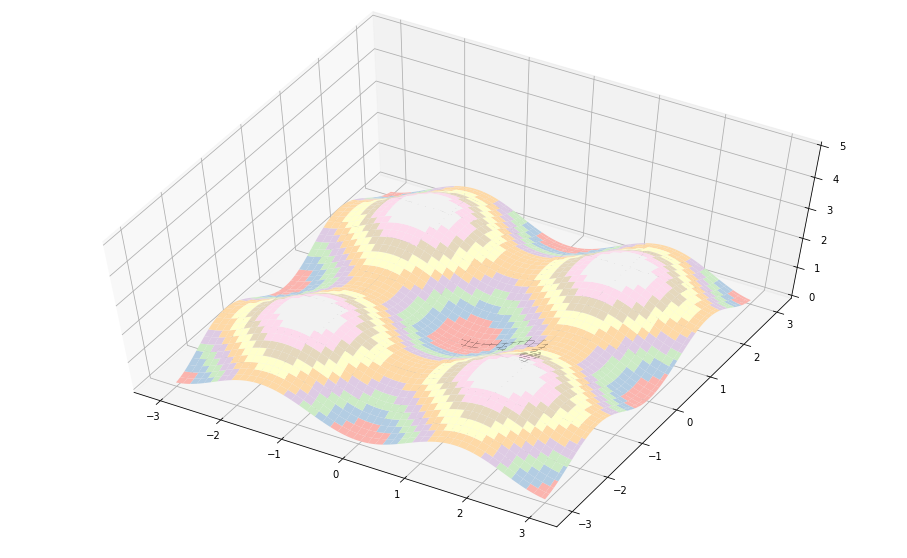

In [7]:
path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2], marker='.', markersize=20,
                markerfacecolor='black', lw=3, c='black')

ax.plot_surface(X, Y, f(X, Y), cmap='Pastel1',)
ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

##Linear Regression using NumPy

$$W_{(k+1)} = W_{(k)} - \eta_k \nabla Q(W_{(k)}),$$
$$\nabla Q(W) = \frac{2}{n}X^T(X*W - Y)$$

In [0]:
X, Y = datasets.make_regression(n_targets=3, n_features=2, noise=10)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [0]:
class LinearRegression:

    def __init__(self, mae_metric=False):
        self.metric = self.calc_mse_metric if not mae_metric else self.calc_mae_metric

    def calc_mae_metric(self, preds, y):
        num_samples = y.shape[0]
        mae = np.sum((np.abs(preds-y))) * (1/num_samples)
        return mae

    def calc_mse_metric(self, preds, y):
        num_samples = y.shape[0]
        mse = np.sum(np.power((preds-y), 2)) * (1/num_samples)
        return mse

    def init_weights(self, input_size, output_size):
        np.random.seed(42)
        self.W = np.random.normal(0, 0.01, size = (input_size, output_size))
        self.b = np.zeros((1, output_size))

    def fit(self, X, y, num_epochs=1000, lr=0.001):

        num_samples, num_targets = y.shape
        n = num_samples * num_targets

        self.init_weights(X.shape[1], y.shape[1])
        
        metrics = []

        for _ in range(num_epochs):
            preds = self.predict(X)

            W_grad = -2 * (X.T @ (y-preds)) / num_samples
            b_grad = -2 * np.sum(y-preds, axis = 0)/num_samples

            self.W -= lr * W_grad
            self.b -= lr * b_grad
            
            metrics.append(self.metric(preds, y))
        return metrics

    def predict(self, X):
        y_pred = X @ self.W + self.b
        return y_pred

In [0]:
model = LinearRegression()
metric = model.fit(X_train, Y_train)

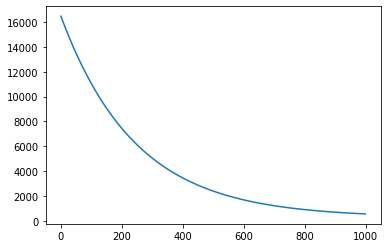

In [11]:
plt.plot(metric)

##Logistic Regression Using GD

In [0]:
X, y = datasets.make_blobs(n_samples=10000, n_features=2, centers=2, random_state = 1)
y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y)

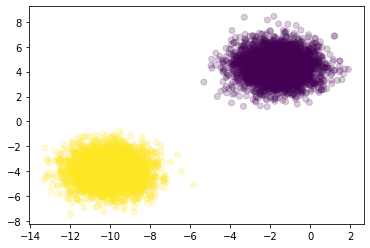

In [37]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:, 0], alpha = 0.2)
plt.show()

Sigmoid: $$ \sigma(h) = \frac{1}{1 + exp(-h)} $$

Class affiliation probability: $$ P(y = 1 | x, w) = \sigma(x, w) $$

Logistic loss function: $$ L(y, p) = - \frac{1}{m}\sum_{1}^{m}(y_i log(p_i) + (1 - y_i) log(1 - p_i)) $$

Accuracy evaluation: $$ Acc = \frac{1}{len(y)}\sum_{i=1}^{len(y)}{I[y_i == (p_i >= threshold)]} $$

In [0]:
def sigmoid(h):
    return 1. / (1 + np.exp(-h))

In [0]:
class LogisticRegressionGD:

    def __init__(self):
        pass

    def __extend_X(self, X):
        n = X.shape[0]
        X_ext = np.concatenate((np.ones((n, 1)), X), axis=1)
        return X_ext

    def init_weights(self, input_size, output_size):
        np.random.seed(42)
        self.W = np.random.normal(0, 0.01, size=(input_size, output_size))

    def get_loss(self, p, y):
        loss = - np.mean(y * np.log(p) + (1-y) * np.log(1-p))
        return loss

    def get_prob(self, X):
        if X.shape[1] != self.W.shape[0]:
            X = self.__extend_X(X)
        return sigmoid(np.dot(X, self.W))

    def get_acc(self, p, y, threshold=0.5):
        acc = np.mean(y == (p >= threshold))
        return acc

    def fit(self, X, y, num_epochs=1000, lr=0.001):
        X = self.__extend_X(X)
        self.init_weights(X.shape[1], y.shape[1])
        accs = []
        losses = []
        for _ in range(num_epochs):
            p = self.get_prob(X)

            W_grad = np.dot(X.T, (p - y)) / len(y)
            self.W -= lr * W_grad

            # for logloss calculations stability
            p = np.clip(p, 1e-10, 1 - 1e-10)

            log_loss = self.get_loss(p, y)
            losses.append(log_loss)
            acc = self.get_acc(p, y)
            accs.append(acc)

        return accs, losses

In [0]:
model = LogisticRegressionGD()
accs, losses = model.fit(X_test, y_test)

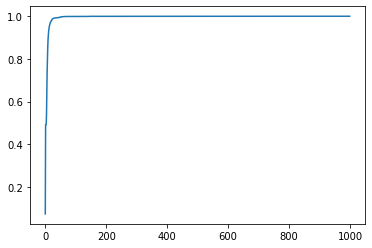

In [44]:
plt.plot(accs)

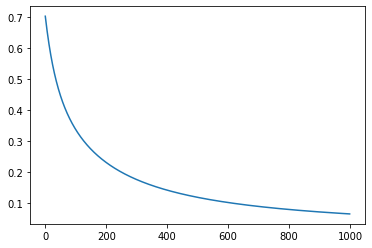

In [45]:
plt.plot(losses)

##Logistic Regression Using SGD

In [0]:
def sigmoid(h):
    return 1. / (1 + np.exp(-h))

In [0]:
def batch_generator(X, y, batch_size=100):
    num_samples = X.shape[0]
    num_batches = int(num_samples / batch_size)
    for i in range(num_batches-1):
        # Yielding batch_size objects with matching targets
        batch_x = X[batch_size * i : batch_size * (i+1)]
        batch_y = y[batch_size * i : batch_size * (i+1)]
        yield (batch_x, batch_y)

In [0]:
class LogisticRegressionSGD:
    def __init__(self):
        pass
    
    def __extend_X(self, X):
        n = X.shape[0]
        X_ext = np.concatenate((np.ones((n, 1)), X), axis=1)
        return X_ext

    def init_weights(self, input_size, output_size):
        np.random.seed(42)
        self.W = np.random.normal(0, 0.01, size=(input_size, output_size))
     
    def get_loss(self, p, y):
        loss = - np.mean(y * np.log(p) + (1-y) * np.log(1-p))
        return loss
    
    def get_prob(self, X):
        if X.shape[1] != self.W.shape[0]:
            X = self.__extend_X(X)
        return sigmoid(np.dot(X, self.W))
    
    def get_acc(self, p, y, threshold=0.5):
        acc = np.mean(y == (p >= threshold))
        return acc

    def fit(self, X, y, num_epochs=10, lr=0.001):
        
        X = self.__extend_X(X)
        self.init_weights(X.shape[1], y.shape[1])
        
        accs = []
        losses = []
        for _ in range(num_epochs):
            gen = batch_generator(X, y)
            for X_, y_ in gen:
                p = self.get_prob(X_)
                W_grad = np.dot(X_.T, (p - y_)) / len(y_)
                self.W -= lr * W_grad

                # for logloss calculations stability
                p = np.clip(p, 1e-10, 1 - 1e-10)

                log_loss = self.get_loss(p, y_)
                losses.append(log_loss)
                acc = self.get_acc(p, y_)
                accs.append(acc)
        return accs, losses

In [0]:
model = LogisticRegressionSGD()
accs, losses = model.fit(X_train, y_train)

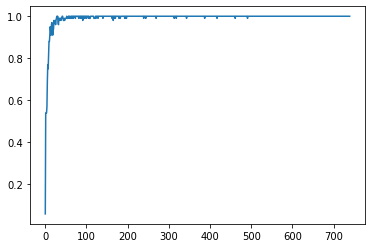

In [65]:
plt.plot(accs)

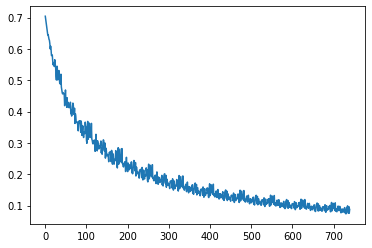

In [66]:
plt.plot(losses)